# Importing Libraries and Dataset

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [117]:
dataset = pd.read_csv("HousePricePrediction.csv")
# Display the first 10 rows of the DataFrame
dataset.head(10)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0,143000.0
6,6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0.0,1686.0,307000.0
7,7,60,RL,10382,Corner,1Fam,6,1973,1973,HdBoard,32.0,1107.0,200000.0
8,8,50,RM,6120,Inside,1Fam,5,1931,1950,BrkFace,0.0,952.0,129900.0
9,9,190,RL,7420,Corner,2fmCon,6,1939,1950,MetalSd,0.0,991.0,118000.0


In [118]:
#(number_of_rows, number_of_columns)
dataset.shape

(2919, 13)

In [119]:
# data types, non-null values

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


<Axes: >

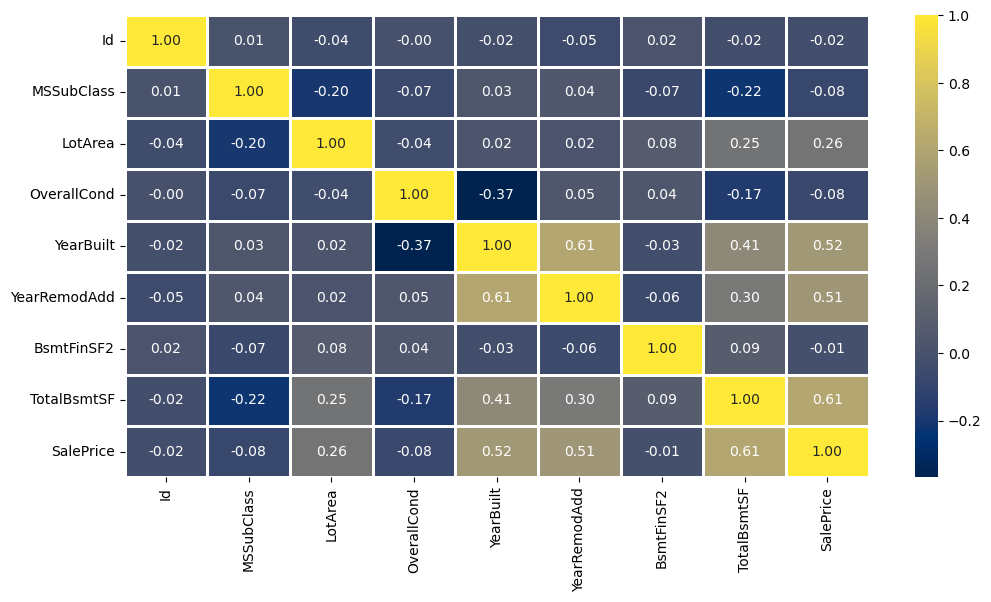

In [120]:
# Select numeric columns
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
numeric_dataset = dataset[numeric_columns]

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_dataset.corr(),
            cmap='cividis',
            fmt='.2f',
            linewidths=2,
            annot=True)

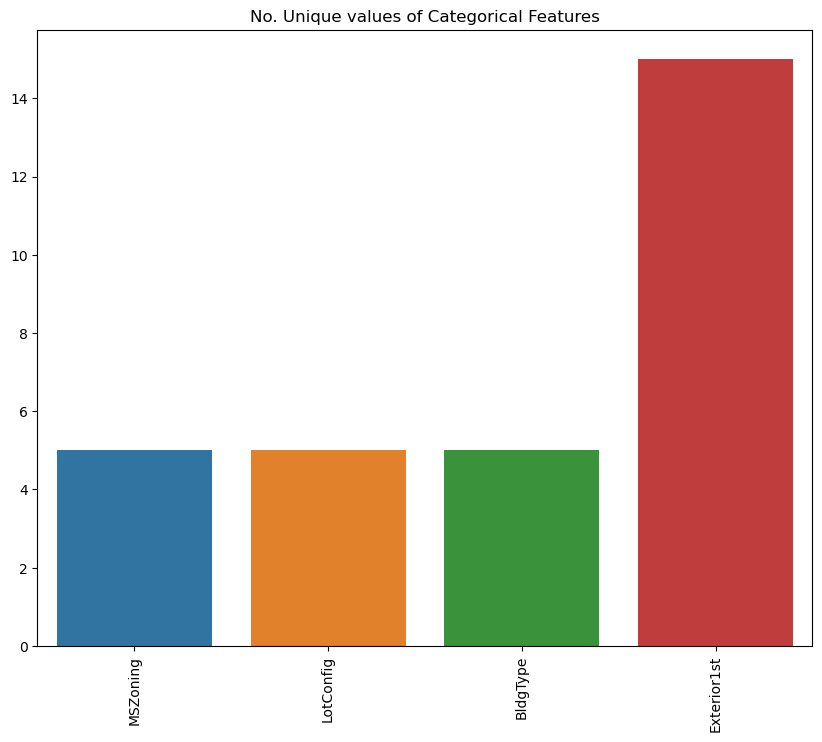

In [121]:
object_cols = dataset.select_dtypes(include=['object']).columns

unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].nunique())

plt.figure(figsize=(10, 8))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols, y=unique_values)
plt.show()

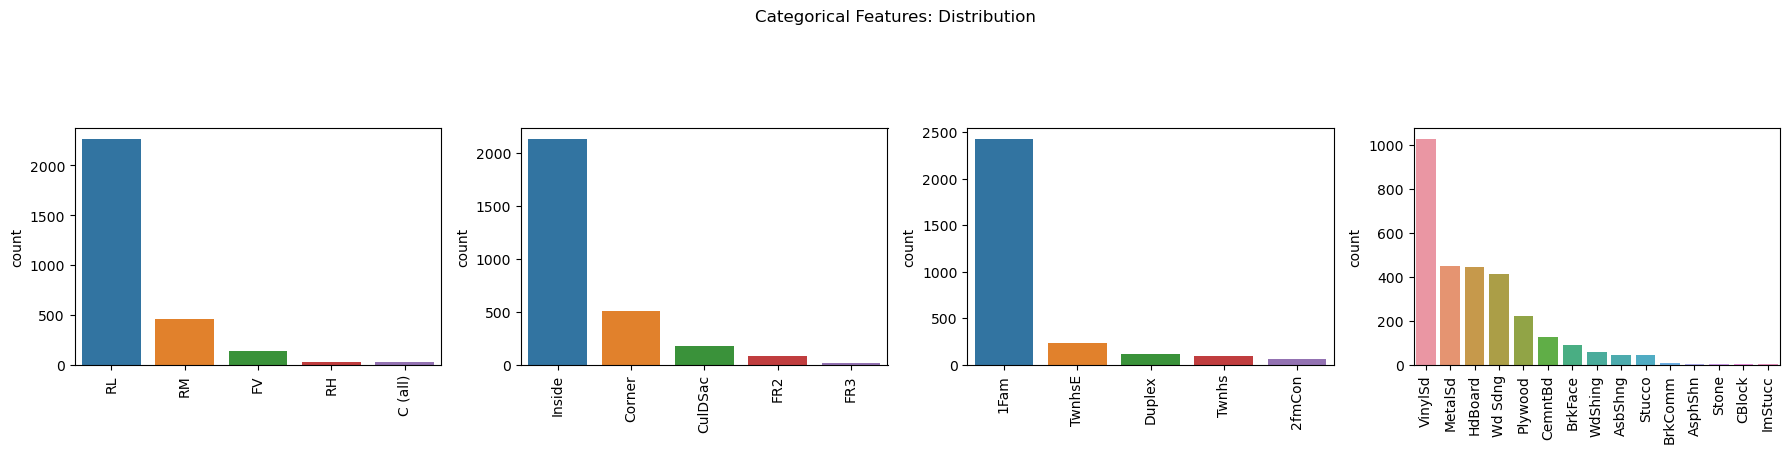

In [122]:
plt.figure(figsize=(18, 36))
plt.suptitle('Categorical Features: Distribution', y=1.02)  # Adjusting title position
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    ax = plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y, ax=ax)
    index += 1

# Explicitly remove overlapping axes
plt.tight_layout()
plt.show()

# Data Cleaning

In [123]:
# Drop the 'Id' column from the DataFrame
dataset.drop(['Id'],
             axis=1,
             inplace=True)

In [124]:
dataset.isna().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [125]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

In [126]:
dataset.isna().sum()

MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [127]:
new_dataset = dataset.dropna()

In [128]:
new_dataset.isna().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [129]:
dataset.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2919.000000
mean,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,56174.332503
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,163000.000000
50%,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,180921.195890
75%,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,180921.195890
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [130]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2919 non-null   int64  
 1   MSZoning      2915 non-null   object 
 2   LotArea       2919 non-null   int64  
 3   LotConfig     2919 non-null   object 
 4   BldgType      2919 non-null   object 
 5   OverallCond   2919 non-null   int64  
 6   YearBuilt     2919 non-null   int64  
 7   YearRemodAdd  2919 non-null   int64  
 8   Exterior1st   2918 non-null   object 
 9   BsmtFinSF2    2918 non-null   float64
 10  TotalBsmtSF   2918 non-null   float64
 11  SalePrice     2919 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 273.8+ KB


# Data Preprocessing

In [131]:
from sklearn.preprocessing import OneHotEncoder
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))


OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


# Splitting Dataset into Training and Testing

In [132]:
# Now you can proceed with the rest of your code
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

# Model and Accuracy

# SVM – Support vector Machine

In [133]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1870512931870423


In [136]:
import pickle
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Create and train the Support Vector Machine model
model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)

# Save the model to a file using pickle
with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(model_SVR, model_file)

# Now the model is saved to 'svm_model.pkl'

# To load the model back
with open('svm_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# You can use the loaded model for predictions
Y_pred = loaded_model.predict(X_valid)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_valid, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2704093823.1798863


# Evaluation

In [137]:
# Load the saved SVM model from the pickle file
with open('svm_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Define the input values including all necessary features
input_values = {
    'MSZoning': 'RL',            # Identifies the general zoning classification of the sale.
    'LotArea': 2645,             # Lot size in square feet.
    'LotConfig': 'Inside',       # Configuration of the lot.
    'BldgType': '1Fam',          # Type of dwelling.
    'OverallCond': 5,            # Rates the overall condition of the house.
    'YearBuilt': 1999,           # Original construction year.
    'YearRemodAdd': 2000,        # Remodel date (same as construction date if no remodeling or additions).
    'Exterior1st': 'MetalSd',    # Exterior covering on house.
    'BsmtFinSF2': 0,             # Type 2 finished square feet.
    'TotalBsmtSF': 970,          # Total square feet of basement area.
}

# Create a DataFrame for the input data
input_data = pd.DataFrame(input_values, index=[0])

# Perform one-hot encoding for categorical variables
input_data_encoded = pd.get_dummies(input_data, columns=['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'])

# Ensure that the one-hot encoding includes all necessary columns
missing_columns = set(loaded_model.feature_names_in_) - set(input_data_encoded.columns)
for column in missing_columns:
    input_data_encoded[column] = 0

# Reorder the columns to match the order during training
input_data_encoded = input_data_encoded[loaded_model.feature_names_in_]

# Use the trained SVR model to make predictions
predictions = loaded_model.predict(input_data_encoded)

# Display the predicted SalePrice
print("Predicted SalePrice:")
print(predictions)

Predicted SalePrice:
[180921.11306854]
